In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


In [ ]:
%pip install transformers torch datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
stock_data = pd.read_csv("stock_data_processed.csv", parse_dates=["Adjusted_Date"])

In [ ]:
news_data_news_api = pd.read_csv("news_data_combined_same_date_1.csv", parse_dates=["Adjusted_Date"])
news_data_google = pd.read_csv("news_data_combined_same_date_2.csv", parse_dates=["Adjusted_Date"])

In [ ]:
news_data_news_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Adjusted_Date  402 non-null    datetime64[ns]
 1   Date           402 non-null    object        
 2   Title          402 non-null    object        
 3   Description    387 non-null    object        
 4   URL            402 non-null    object        
 5   Stock_Name     402 non-null    object        
 6   Date_Formated  402 non-null    object        
 7   full_news      402 non-null    object        
 8   news_combined  402 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 28.4+ KB


In [ ]:
news_data_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Adjusted_Date   1674 non-null   datetime64[ns]
 1   keyword         1674 non-null   object        
 2   title           1674 non-null   object        
 3   description     1554 non-null   object        
 4   url             1674 non-null   object        
 5   published_date  1674 non-null   object        
 6   Stock_Name      1674 non-null   object        
 7   Language        1674 non-null   object        
 8   date_formatted  1674 non-null   object        
 9   title_new       1674 non-null   object        
 10  source          1674 non-null   object        
 11  full_news       1674 non-null   object        
 12  news_combined   1674 non-null   object        
dtypes: datetime64[ns](1), object(12)
memory usage: 170.1+ KB


In [ ]:
merged_news_df = pd.merge(news_data_news_api, news_data_google,
                     on=['Adjusted_Date', 'Stock_Name'],
                     how='outer')

In [ ]:
merged_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Adjusted_Date    1813 non-null   datetime64[ns]
 1   Date             402 non-null    object        
 2   Title            402 non-null    object        
 3   Description      387 non-null    object        
 4   URL              402 non-null    object        
 5   Stock_Name       1813 non-null   object        
 6   Date_Formated    402 non-null    object        
 7   full_news_x      402 non-null    object        
 8   news_combined_x  402 non-null    object        
 9   keyword          1674 non-null   object        
 10  title            1674 non-null   object        
 11  description      1554 non-null   object        
 12  url              1674 non-null   object        
 13  published_date   1674 non-null   object        
 14  Language         1674 non-null   object 

In [ ]:
merged_news_df['news_combined'] = merged_news_df['news_combined_x'].fillna('') + ' ' + merged_news_df['news_combined_y'].fillna('')

In [ ]:
merged_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Adjusted_Date    1813 non-null   datetime64[ns]
 1   Date             402 non-null    object        
 2   Title            402 non-null    object        
 3   Description      387 non-null    object        
 4   URL              402 non-null    object        
 5   Stock_Name       1813 non-null   object        
 6   Date_Formated    402 non-null    object        
 7   full_news_x      402 non-null    object        
 8   news_combined_x  402 non-null    object        
 9   keyword          1674 non-null   object        
 10  title            1674 non-null   object        
 11  description      1554 non-null   object        
 12  url              1674 non-null   object        
 13  published_date   1674 non-null   object        
 14  Language         1674 non-null   object 

In [ ]:
merged_news_df.to_csv("merged_news.csv")

In [ ]:
news_data = pd.read_csv("merged_news.csv", parse_dates=["Adjusted_Date"])

In [ ]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       1813 non-null   int64         
 1   Adjusted_Date    1813 non-null   datetime64[ns]
 2   Date             402 non-null    object        
 3   Title            402 non-null    object        
 4   Description      387 non-null    object        
 5   URL              402 non-null    object        
 6   Stock_Name       1813 non-null   object        
 7   Date_Formated    402 non-null    object        
 8   full_news_x      402 non-null    object        
 9   news_combined_x  402 non-null    object        
 10  keyword          1674 non-null   object        
 11  title            1674 non-null   object        
 12  description      1554 non-null   object        
 13  url              1674 non-null   object        
 14  published_date   1674 non-null   object 

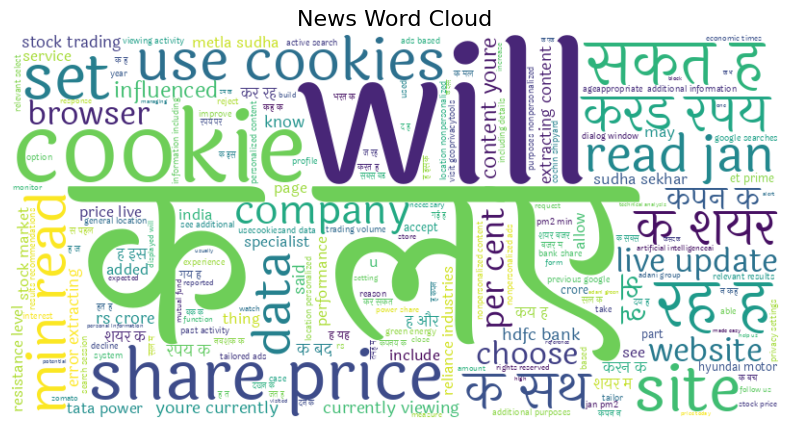

In [ ]:
# Combine all text from the 'news_combined' column into a single string

filtered_text = news_data['news_combined'].str.replace(r'\b(body|title|newarticle)\b', '', regex=True)
# Join the filtered text into a single string
combined_text = ' '.join(filtered_text)

# font_path = "/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf"
font_path = "Laila-Regular.ttf"

# Generate the word cloud
wordcloud = WordCloud(font_path=font_path,width=800, height=400, background_color='white', colormap='viridis').generate(combined_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('News Word Cloud', fontsize=16)
plt.show()

In [ ]:
news_data['news_len'] = news_data['news_combined'].apply(lambda x: len(x.split(' ')))

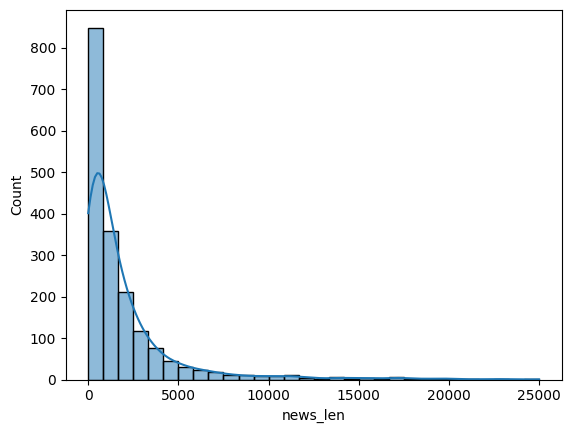

In [ ]:
sns.histplot(data=news_data,x="news_len",kde=True,bins=30);

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def load_hindi_stopwords(filepath):
    """Loads Hindi stopwords from a text file."""
    with open(filepath, 'r', encoding='utf-8') as file:
        stopwords = set(file.read().splitlines())
    return stopwords

hindi_stop_words = load_hindi_stopwords('stopwords-hi.txt')
english_stop_words = set(stopwords.words('english'))

stop_words = hindi_stop_words.union(english_stop_words)

def preprocess_news(news):
  # news = re.sub(r'[^a-zA-Z]', ' ',news)
  # news = news.lower()
  # tokens = word_tokenize(news)
    news = re.sub(r'[^a-zA-Z\u0900-\u097F\s]', ' ', news)

    # Convert text to lowercase (affects only English characters; Hindi remains unaffected)
    news = news.lower()

    # Tokenize the text into words
    tokens = word_tokenize(news)

  # stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
news_data['news_combined_processed'] = news_data['news_combined'].apply(preprocess_news)

In [ ]:
news_data.head()

,Unnamed: 0,Adjusted_Date,Date,Title,Description,URL,Stock_Name,Date_Formated,full_news_x,news_combined_x,...,published_date,Language,date_formatted,title_new,source,full_news_y,news_combined_y,news_combined,news_len,news_combined_processed
0,0,2024-09-02,NaN,NaN,NaN,NaN,ADANIENT.NS,NaN,NaN,NaN,...,2024-09-02 07:00:00,hi,2024-09-02,adani इन बड कपनय क जलद खरद सकत ह अडन मरकट म म...,Prabhat Khabar,---title--- adani इन बड कपनय क जलद खरद सकत ह...,---title--- adani इन बड कपनय क जलद खरद सकत ह...,---title--- adani इन बड कपनय क जलद खरद सकत ...,1878,title adani बड कपनय क जलद खरद सकत ह अडन मरकट म...
1,1,2024-09-02,NaN,NaN,NaN,NaN,ASIANPAINT.NS,NaN,NaN,NaN,...,2024-09-02 07:00:00,en,2024-09-02,asian paints share price today updates asian p...,The Economic Times,---title--- asian paints share price today up...,---title--- asian paints share price today up...,---title--- asian paints share price today u...,379,title asian paints share price today updates a...
2,2,2024-09-02,NaN,NaN,NaN,NaN,AUROPHARMA.NS,NaN,NaN,NaN,...,2024-09-02 07:00:00,en,2024-09-02,aurobindo pharma says 14 biosimilar products u...,The Hindu,---title--- aurobindo pharma says 14 biosimil...,---title--- aurobindo pharma says 14 biosimil...,---title--- aurobindo pharma says 14 biosimi...,2395,title aurobindo pharma says biosimilar product...
3,3,2024-09-02,NaN,NaN,NaN,NaN,COCHINSHIP.NS,NaN,NaN,NaN,...,2024-09-01 07:00:00,hi,2024-09-01,cochin shipyard क शयर म हआ गजब क करकशन कय अब भ...,Times Now Navbharat,---title--- cochin shipyard क शयर म हआ गजब क ...,---title--- cochin shipyard क शयर म हआ गजब क ...,---title--- cochin shipyard क शयर म हआ गजब क...,958,title cochin shipyard क शयर म हआ गजब क करकशन क...
4,4,2024-09-02,NaN,NaN,NaN,NaN,HDFCBANK.NS,NaN,NaN,NaN,...,2024-09-02 07:00:00,en,2024-09-02,hdfc bank executive on apple partnership tempo...,Mint,---title--- hdfc bank executive on apple part...,---title--- hdfc bank executive on apple part...,---title--- hdfc bank executive on apple par...,416,title hdfc bank executive apple partnership te...


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [ ]:
def get_finBert_sentiment(news):
  inputs = tokenizer(news, return_tensors="pt", truncation=True, padding=True, max_length = 256)
  outputs = model(**inputs)
  probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
  sentiment = torch.argmax(probs, dim=1).item()
  labels = {0: 'negative',1: 'neutral', 2: 'positive'}
  return labels[sentiment]

In [ ]:
news_data['sentiment'] = news_data['news_combined_processed'].apply(get_finBert_sentiment)

In [ ]:
news_data['label'] = news_data['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

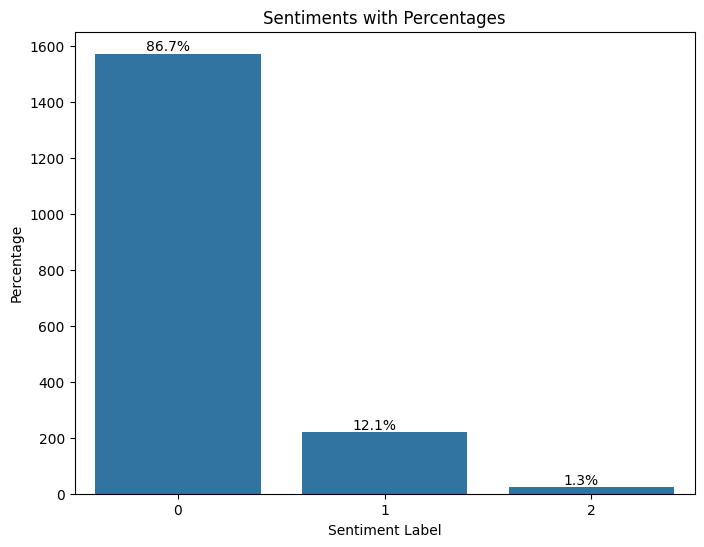

In [ ]:
# countplot for label mappings and each value percentage
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=news_data, x="label")
total = len(news_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

ax.set_xlabel('Sentiment Label')
ax.set_ylabel('Percentage')
ax.set_title('Sentiments with Percentages')

plt.show()

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset

train_news , test_news, train_labels , test_labels = train_test_split(news_data['news_combined_processed'], news_data['label'], test_size = 0.2)

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
train_encodings = tokenizer(list(train_news), truncation=True, padding=True, max_length = 256)
test_encodings = tokenizer(list(test_news), truncation=True, padding=True, max_length = 256)

train_dataset = Dataset.from_dict({"input_ids": train_encodings['input_ids'], "attention_mask": train_encodings['attention_mask'], "labels": train_labels})
test_dataset = Dataset.from_dict({"input_ids": test_encodings['input_ids'], "attention_mask": test_encodings['attention_mask'], "labels": test_labels})

model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)
trainingArgs = TrainingArguments(output_dir = "./results", evaluation_strategy = "epoch", save_strategy="epoch",learning_rate=2e-5, per_device_train_batch_size=16, num_train_epochs=3)
trainer = Trainer(model = model, args = trainingArgs, train_dataset = train_dataset, eval_dataset = test_dataset)
trainer.train()

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss
1,No log,0.358079
2,No log,0.282854
3,No log,0.276449


TrainOutput(global_step=273, training_loss=0.28170689733037146, metrics={'train_runtime': 15343.8805, 'train_samples_per_second': 0.284, 'train_steps_per_second': 0.018, 'total_flos': 572271683558400.0, 'train_loss': 0.28170689733037146, 'epoch': 3.0})

In [ ]:
# Define a directory to save the model
output_dir = "./trained_model"

# Save the model
trainer.save_model(output_dir)

# Save the tokenizer
tokenizer.save_pretrained(output_dir)


('./trained_model/tokenizer_config.json',
 './trained_model/special_tokens_map.json',
 './trained_model/vocab.txt',
 './trained_model/added_tokens.json')

In [ ]:
import json
import os
# Save the training arguments
training_args_file = os.path.join(output_dir, "training_args.json")
with open(training_args_file, "w") as f:
    json.dump(trainingArgs.to_dict(), f, indent=4)

# Save evaluation metrics (if any)
eval_metrics = trainer.evaluate()
eval_metrics_file = os.path.join(output_dir, "eval_metrics.json")
with open(eval_metrics_file, "w") as f:
    json.dump(eval_metrics, f, indent=4)

In [ ]:
!zip -r trained_model.zip ./trained_model

  adding: trained_model/ (stored 0%)
  adding: trained_model/model.safetensors (deflated 7%)
  adding: trained_model/eval_metrics.json (deflated 33%)
  adding: trained_model/training_args.bin (deflated 51%)
  adding: trained_model/vocab.txt (deflated 45%)
  adding: trained_model/config.json (deflated 55%)
  adding: trained_model/training_args.json (deflated 67%)
  adding: trained_model/tokenizer_config.json (deflated 75%)
  adding: trained_model/special_tokens_map.json (deflated 42%)


In [ ]:
# from google.colab import files
# files.download('trained_model.zip')

In [ ]:
# import zipfile
# import os

# zip_file = "trained_model.zip"
# extract_to = "./trained_model"

# os.makedirs(extract_to, exist_ok=True)

# # Open and extract the zip file
# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print(f"Files extracted to: {extract_to}")


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

model = BertForSequenceClassification.from_pretrained("./trained_model")
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [ ]:
def predict_sentiments(news):
  inputs = tokenizer(news, return_tensors="pt", truncation=True, padding=True, max_length = 256)
  outputs = model(**inputs)
  probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
  return probs.detach().numpy()

In [ ]:
news_data['sentiment_scores'] = news_data['news_combined_processed'].apply(predict_sentiments)

In [ ]:
news_data.head()

,Unnamed: 0,Adjusted_Date,Date,Title,Description,URL,Stock_Name,Date_Formated,full_news_x,news_combined_x,...,title_new,source,full_news_y,news_combined_y,news_combined,news_len,news_combined_processed,sentiment,label,sentiment_scores
0,0,2024-09-02,NaN,NaN,NaN,NaN,ADANIENT.NS,NaN,NaN,NaN,...,adani इन बड कपनय क जलद खरद सकत ह अडन मरकट म म...,Prabhat Khabar,---title--- adani इन बड कपनय क जलद खरद सकत ह...,---title--- adani इन बड कपनय क जलद खरद सकत ह...,---title--- adani इन बड कपनय क जलद खरद सकत ...,1878,title adani बड कपनय क जलद खरद सकत ह अडन मरकट म...,negative,0,"[[0.9925599, 0.0041068746, 0.0033332817]]"
1,1,2024-09-02,NaN,NaN,NaN,NaN,ASIANPAINT.NS,NaN,NaN,NaN,...,asian paints share price today updates asian p...,The Economic Times,---title--- asian paints share price today up...,---title--- asian paints share price today up...,---title--- asian paints share price today u...,379,title asian paints share price today updates a...,negative,0,"[[0.9420279, 0.050780974, 0.0071911756]]"
2,2,2024-09-02,NaN,NaN,NaN,NaN,AUROPHARMA.NS,NaN,NaN,NaN,...,aurobindo pharma says 14 biosimilar products u...,The Hindu,---title--- aurobindo pharma says 14 biosimil...,---title--- aurobindo pharma says 14 biosimil...,---title--- aurobindo pharma says 14 biosimi...,2395,title aurobindo pharma says biosimilar product...,negative,0,"[[0.9770314, 0.01901523, 0.003953388]]"
3,3,2024-09-02,NaN,NaN,NaN,NaN,COCHINSHIP.NS,NaN,NaN,NaN,...,cochin shipyard क शयर म हआ गजब क करकशन कय अब भ...,Times Now Navbharat,---title--- cochin shipyard क शयर म हआ गजब क ...,---title--- cochin shipyard क शयर म हआ गजब क ...,---title--- cochin shipyard क शयर म हआ गजब क...,958,title cochin shipyard क शयर म हआ गजब क करकशन क...,negative,0,"[[0.992837, 0.0041968576, 0.0029661448]]"
4,4,2024-09-02,NaN,NaN,NaN,NaN,HDFCBANK.NS,NaN,NaN,NaN,...,hdfc bank executive on apple partnership tempo...,Mint,---title--- hdfc bank executive on apple part...,---title--- hdfc bank executive on apple part...,---title--- hdfc bank executive on apple par...,416,title hdfc bank executive apple partnership te...,neutral,1,"[[0.19598787, 0.76030135, 0.04371078]]"


In [ ]:
def parse_sentiment_scores(score_string):
  """Parses a sentiment score string and returns a list of floats."""
  score_string = str(score_string).strip('[]')  # Remove brackets
  scores = score_string.split()  # Split by whitespace
  return [float(score) for score in scores]  # Convert to floats

In [ ]:
news_data['sentiment_scores_parsed'] = news_data['sentiment_scores'].apply(parse_sentiment_scores)

In [ ]:
# Create new columns for each sentiment score
sentiment_columns = ['negative_score', 'neutral_score', 'positive_score']
sentiment_df = pd.DataFrame(news_data['sentiment_scores_parsed'].to_list(), columns=sentiment_columns)

# Concatenate the sentiment scores DataFrame with the original DataFrame
news_data = pd.concat([news_data, sentiment_df], axis=1)

In [ ]:
news_data

,Unnamed: 0,Adjusted_Date,Date,Title,Description,URL,Stock_Name,Date_Formated,full_news_x,news_combined_x,...,news_combined,news_len,news_combined_processed,sentiment,label,sentiment_scores,sentiment_scores_parsed,negative_score,neutral_score,positive_score
0,0,2024-09-02,NaN,NaN,NaN,NaN,ADANIENT.NS,NaN,NaN,NaN,...,---title--- adani इन बड कपनय क जलद खरद सकत ...,1878,title adani बड कपनय क जलद खरद सकत ह अडन मरकट म...,negative,0,"[[0.9925599, 0.0041068746, 0.0033332817]]","[0.9925599, 0.00410687, 0.00333328]",0.992560,0.004107,0.003333
1,1,2024-09-02,NaN,NaN,NaN,NaN,ASIANPAINT.NS,NaN,NaN,NaN,...,---title--- asian paints share price today u...,379,title asian paints share price today updates a...,negative,0,"[[0.9420279, 0.050780974, 0.0071911756]]","[0.9420279, 0.05078097, 0.00719118]",0.942028,0.050781,0.007191
2,2,2024-09-02,NaN,NaN,NaN,NaN,AUROPHARMA.NS,NaN,NaN,NaN,...,---title--- aurobindo pharma says 14 biosimi...,2395,title aurobindo pharma says biosimilar product...,negative,0,"[[0.9770314, 0.01901523, 0.003953388]]","[0.9770314, 0.01901523, 0.00395339]",0.977031,0.019015,0.003953
3,3,2024-09-02,NaN,NaN,NaN,NaN,COCHINSHIP.NS,NaN,NaN,NaN,...,---title--- cochin shipyard क शयर म हआ गजब क...,958,title cochin shipyard क शयर म हआ गजब क करकशन क...,negative,0,"[[0.992837, 0.0041968576, 0.0029661448]]","[0.992837, 0.00419686, 0.00296614]",0.992837,0.004197,0.002966
4,4,2024-09-02,NaN,NaN,NaN,NaN,HDFCBANK.NS,NaN,NaN,NaN,...,---title--- hdfc bank executive on apple par...,416,title hdfc bank executive apple partnership te...,neutral,1,"[[0.19598787, 0.76030135, 0.04371078]]","[0.19598787, 0.76030135, 0.04371078]",0.195988,0.760301,0.043711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,1808,2025-01-01,NaN,NaN,NaN,NaN,TCS.NS,NaN,NaN,NaN,...,---title--- tcs q3 results 9 जनवर क हग रजलट ...,3188,title tcs q results जनवर क हग रजलट क ऐलन तसर ड...,negative,0,"[[0.9922246, 0.0048504495, 0.0029250588]]","[0.9922246, 0.00485045, 0.00292506]",0.992225,0.004850,0.002925
1809,1809,2025-01-01,NaN,NaN,NaN,NaN,TECHM.NS,NaN,NaN,NaN,...,---title--- video सडन टसट कतन बज हग शर जन मच...,10106,title video सडन टसट कतन बज हग शर जन मच क टइमग ...,negative,0,"[[0.9925863, 0.0041779196, 0.0032356945]]","[0.9925863, 0.00417792, 0.00323569]",0.992586,0.004178,0.003236
1810,1810,2025-01-01,NaN,NaN,NaN,NaN,TITAN.NS,NaN,NaN,NaN,...,---title--- titan company शयर क कमत म 029 ऊप...,4351,title titan company शयर क कमत म ऊपर body busin...,negative,0,"[[0.99274606, 0.004184806, 0.0030691752]]","[0.99274606, 0.00418481, 0.00306918]",0.992746,0.004185,0.003069
1811,1811,2025-01-01,NaN,NaN,NaN,NaN,VEDL.NS,NaN,NaN,NaN,...,---title--- vedanta शयर क कमत म 018 कम ---bo...,2496,title vedanta शयर क कमत म कम body error extrac...,neutral,1,"[[0.15067446, 0.8027147, 0.04661078]]","[0.15067446, 0.8027147, 0.04661078]",0.150674,0.802715,0.046611


In [ ]:
news_data.drop(columns=['sentiment_scores','sentiment_scores_parsed'], inplace=True)

In [ ]:
news_data['label'].value_counts()

,count
label,
0,1571
1,219
2,23


In [ ]:
news_data.to_csv("news_data_with_sentiment_bert.csv")

In [ ]:
from google.colab import files
files.download('news_data_with_sentiment_bert.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
news_data_with_sentiment = pd.read_csv("news_data_with_sentiment_bert.csv",parse_dates=["Adjusted_Date"])

In [ ]:
merged_data =  pd.merge(stock_data, news_data_with_sentiment, on=["Stock_Name","Adjusted_Date"], how="left")
merged_data = merged_data.sort_values(by=["Stock_Name", "Adjusted_Date"])

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date_x                   2018 non-null   object        
 1   Open                     2018 non-null   float64       
 2   High                     2018 non-null   float64       
 3   Low                      2018 non-null   float64       
 4   Close                    2018 non-null   float64       
 5   Volume                   2018 non-null   int64         
 6   Dividends                2018 non-null   float64       
 7   Stock Splits             2018 non-null   float64       
 8   Stock_Name               2018 non-null   object        
 9   Adjusted_Date            2018 non-null   datetime64[ns]
 10  open_next_day            1994 non-null   float64       
 11  open_close_diff          2018 non-null   float64       
 12  close_next_open_diff     2018 non-

In [ ]:
columns_to_keep = ['Stock_Name', 'Adjusted_Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Label', 'negative_score', 'neutral_score', 'positive_score']

In [ ]:
final_data = merged_data[columns_to_keep]

final_data.dropna(inplace=True)

<ipython-input-7-34a33fd5ebfb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.dropna(inplace=True)


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1605 entries, 0 to 2013
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Stock_Name      1605 non-null   object        
 1   Adjusted_Date   1605 non-null   datetime64[ns]
 2   Open            1605 non-null   float64       
 3   High            1605 non-null   float64       
 4   Low             1605 non-null   float64       
 5   Close           1605 non-null   float64       
 6   Volume          1605 non-null   int64         
 7   Dividends       1605 non-null   float64       
 8   Stock Splits    1605 non-null   float64       
 9   Label           1605 non-null   int64         
 10  negative_score  1605 non-null   float64       
 11  neutral_score   1605 non-null   float64       
 12  positive_score  1605 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 175.5+ KB


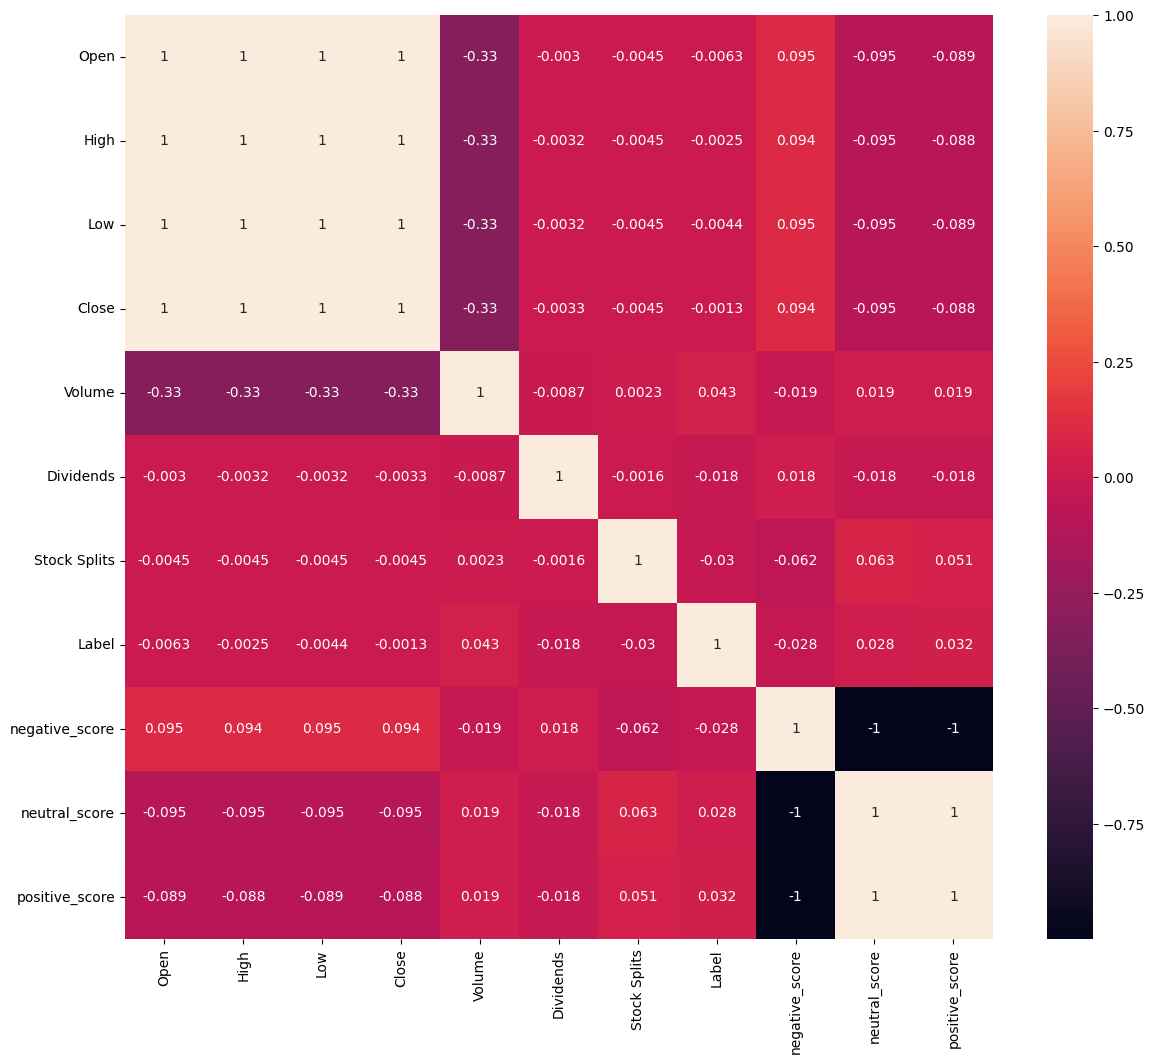

In [ ]:
plt.figure(figsize=(14, 12))
correlation_matrix = final_data.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot= True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, spearmanr

In [ ]:
final_data_analysis = final_data.copy()

final_data_analysis["Percentage_Change"] = final_data_analysis.groupby("Stock_Name")["Close"].pct_change() * 100

In [ ]:
final_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1605 entries, 0 to 2013
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Stock_Name         1605 non-null   object        
 1   Adjusted_Date      1605 non-null   datetime64[ns]
 2   Open               1605 non-null   float64       
 3   High               1605 non-null   float64       
 4   Low                1605 non-null   float64       
 5   Close              1605 non-null   float64       
 6   Volume             1605 non-null   int64         
 7   Dividends          1605 non-null   float64       
 8   Stock Splits       1605 non-null   float64       
 9   Label              1605 non-null   int64         
 10  negative_score     1605 non-null   float64       
 11  neutral_score      1605 non-null   float64       
 12  positive_score     1605 non-null   float64       
 13  Percentage_Change  1581 non-null   float64       
dtypes: datetime64

In [ ]:
final_data_analysis.dropna(inplace=True)

In [ ]:
final_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1581 entries, 1 to 2013
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Stock_Name         1581 non-null   object        
 1   Adjusted_Date      1581 non-null   datetime64[ns]
 2   Open               1581 non-null   float64       
 3   High               1581 non-null   float64       
 4   Low                1581 non-null   float64       
 5   Close              1581 non-null   float64       
 6   Volume             1581 non-null   int64         
 7   Dividends          1581 non-null   float64       
 8   Stock Splits       1581 non-null   float64       
 9   Label              1581 non-null   int64         
 10  negative_score     1581 non-null   float64       
 11  neutral_score      1581 non-null   float64       
 12  positive_score     1581 non-null   float64       
 13  Percentage_Change  1581 non-null   float64       
dtypes: datetime64

In [ ]:
# Initialize results storage
results = []

# Analyze each stock separately
for stock, stock_data in final_data_analysis.groupby("Stock_Name"):
    # Standardize the sentiment scores and percentage changes
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(stock_data[["positive_score", "negative_score", "neutral_score", "Percentage_Change"]])
    stock_data_scaled = pd.DataFrame(scaled_features, columns=["positive_score", "negative_score", "neutral_score", "Percentage_Change"])

    # Linear regression setup
    X = stock_data_scaled[["positive_score", "negative_score", "neutral_score"]]
    y = stock_data_scaled["Percentage_Change"]
    reg_model = LinearRegression()
    reg_model.fit(X, y)

    # Linear regression results
    coefficients = reg_model.coef_
    intercept = reg_model.intercept_
    r_squared = reg_model.score(X, y)

    # Correlation metrics
    correlation_metrics = {}
    for sentiment in ["positive_score", "negative_score", "neutral_score"]:
        # Pearson correlation
        pearson_corr, pearson_pval = pearsonr(stock_data_scaled[sentiment], stock_data_scaled["Percentage_Change"])
        # Spearman correlation
        spearman_corr, spearman_pval = spearmanr(stock_data_scaled[sentiment], stock_data_scaled["Percentage_Change"])
        correlation_metrics[sentiment] = {
            "Pearson Correlation": pearson_corr,
            "Spearman Correlation": spearman_corr,
        }

    # Consolidate results
    results.append({
        "Stock": stock,
        "Linear Regression Coefficients": coefficients.tolist(),
        "Intercept": intercept,
        "R-Squared": r_squared,
        "Correlation Metrics": correlation_metrics,
    })

In [ ]:
df_summary = pd.DataFrame(results)

In [ ]:
df_summary

,Stock,Linear Regression Coefficients,Intercept,R-Squared,Correlation Metrics
0,ADANIENT.NS,"[-37107.10349708052, -688606.9711964496, -6517...",-3.580962e-10,0.027890,{'positive_score': {'Pearson Correlation': 0.1...
1,ASIANPAINT.NS,"[-9244.579186021992, -171995.22087273028, -162...",-1.787711e-11,0.020277,{'positive_score': {'Pearson Correlation': 0.1...
2,AUROPHARMA.NS,"[-79832.668096442, -1445909.6202224507, -13667...",4.969255e-10,0.095023,{'positive_score': {'Pearson Correlation': 0.1...
3,COCHINSHIP.NS,"[-12757.532079675113, -227074.7662522842, -214...",-1.124747e-10,0.008668,{'positive_score': {'Pearson Correlation': 0.0...
4,DMART.NS,"[-3355.7844892801854, -61224.82434847971, -578...",7.276966e-11,0.019992,{'positive_score': {'Pearson Correlation': -0....
5,HDFCBANK.NS,"[-90446.96440594514, -1600086.5822467182, -150...",-8.288519e-11,0.071696,{'positive_score': {'Pearson Correlation': -0....
6,HYUNDAI.NS,"[16720.444401159268, 359391.21828311257, 34273...",6.577170e-11,0.031021,{'positive_score': {'Pearson Correlation': -0....
7,INFY.NS,"[17681.10583560565, 325792.4651739277, 308179....",4.514615e-11,0.004918,{'positive_score': {'Pearson Correlation': -0....
8,IRCTC.NS,"[133.2660172663691, 2235.576846988588, 2118.91...",-1.164833e-11,0.034034,{'positive_score': {'Pearson Correlation': 0.0...
9,ITC.NS,"[-6164.814640473482, -113749.07510786864, -107...",-4.311470e-11,0.008988,{'positive_score': {'Pearson Correlation': -0....


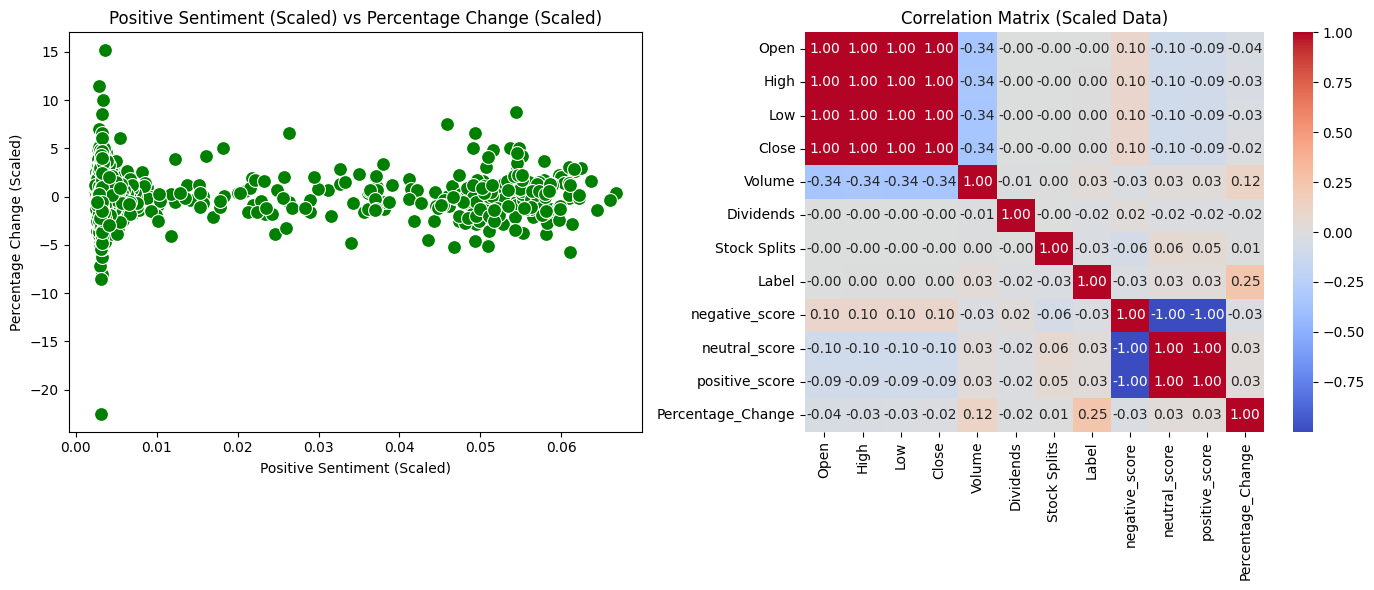

In [ ]:
plt.figure(figsize=(14, 6))

# Scatterplot for Positive Sentiment (scaled) vs Percentage Change (scaled)
plt.subplot(1, 2, 1)
sns.scatterplot(x=final_data_analysis["positive_score"], y=final_data_analysis["Percentage_Change"], color="green", s=100)
plt.title("Positive Sentiment (Scaled) vs Percentage Change (Scaled)")
plt.xlabel("Positive Sentiment (Scaled)")
plt.ylabel("Percentage Change (Scaled)")

# Correlation heatmap for scaled data
correlation_matrix_scaled = final_data_analysis.select_dtypes(include=['number']).corr()
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_scaled, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Scaled Data)")

plt.tight_layout()
plt.show()

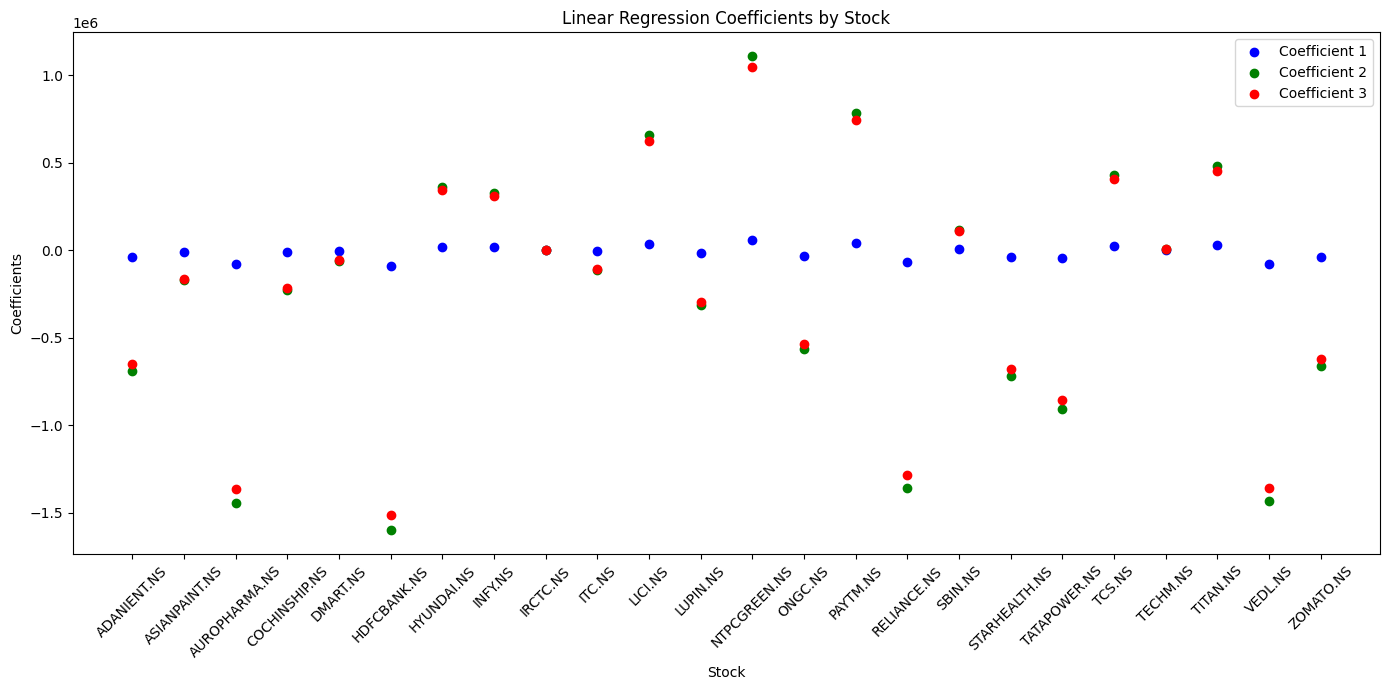

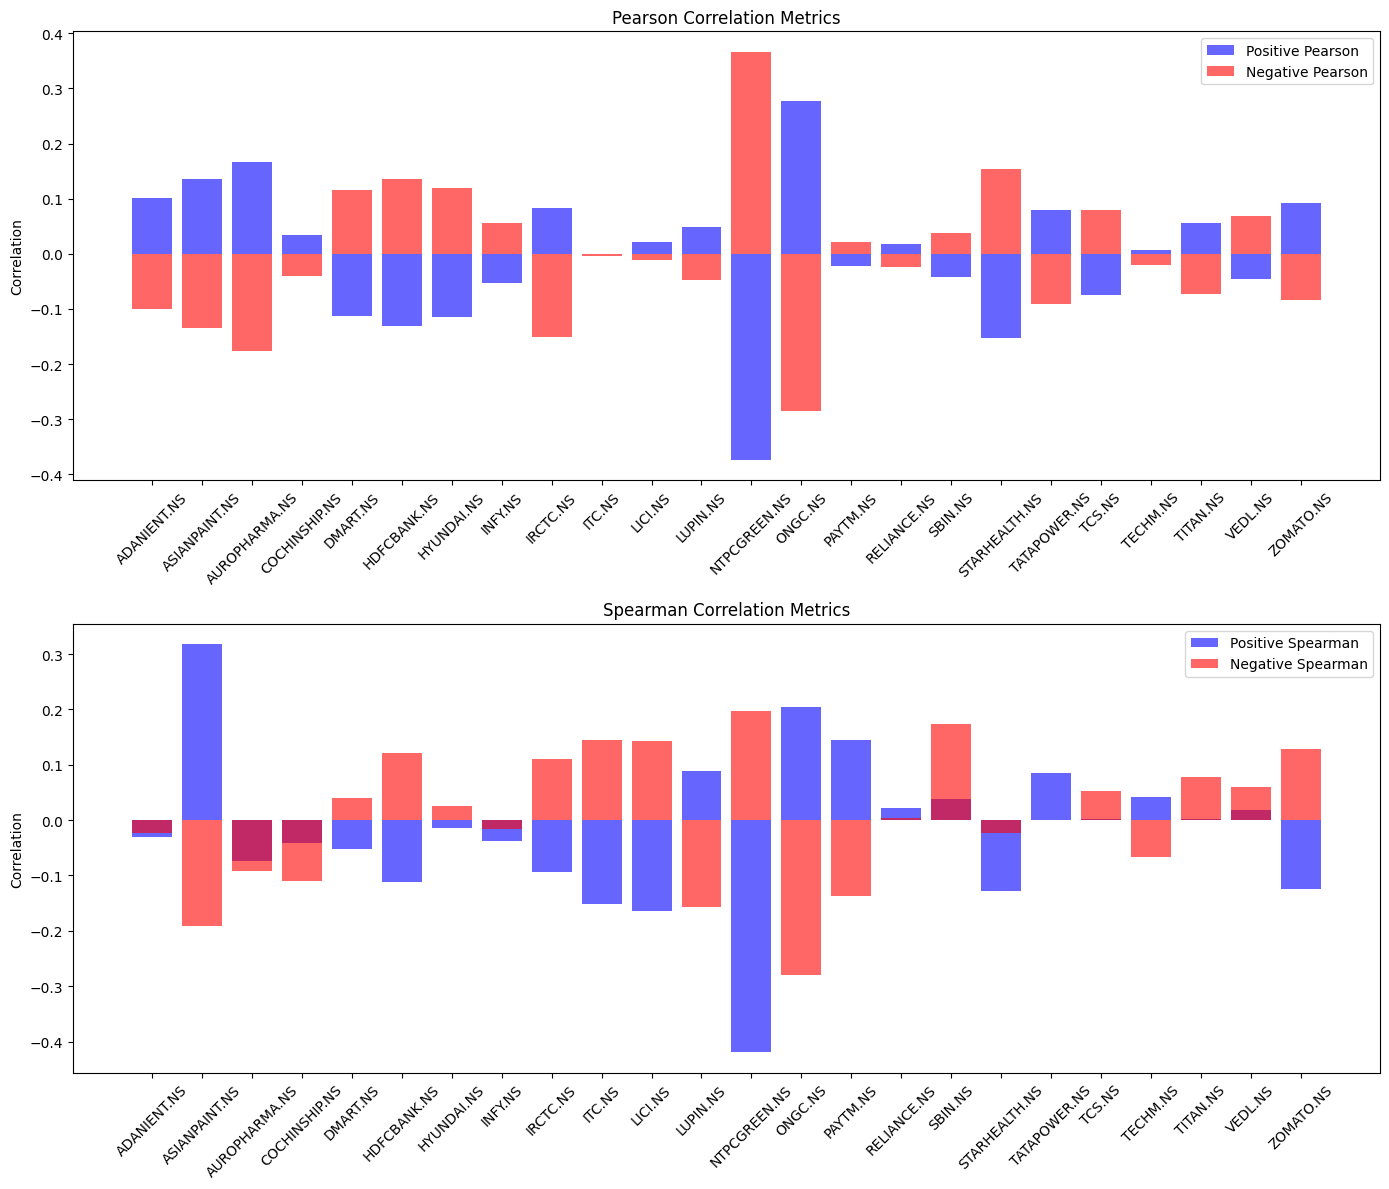

In [ ]:
import ast

df_summary['Linear Regression Coefficients'] = df_summary['Linear Regression Coefficients'].astype(str).apply(ast.literal_eval)
df_summary['Linear Regression Coefficients'] = df_summary['Linear Regression Coefficients'].apply(lambda x: [float(i) for i in x])

# Similarly, ensure 'Correlation Metrics' column is of string type
df_summary['Correlation Metrics'] = df_summary['Correlation Metrics'].astype(str).apply(ast.literal_eval)

# Extract individual components from parsed data
df_summary['Coefficient_1'] = df_summary['Linear Regression Coefficients'].apply(lambda x: x[0])
df_summary['Coefficient_2'] = df_summary['Linear Regression Coefficients'].apply(lambda x: x[1])
df_summary['Coefficient_3'] = df_summary['Linear Regression Coefficients'].apply(lambda x: x[2])
df_summary['Positive_Pearson'] = df_summary['Correlation Metrics'].apply(lambda x: x['positive_score']['Pearson Correlation'])
df_summary['Positive_Spearman'] = df_summary['Correlation Metrics'].apply(lambda x: x['positive_score']['Spearman Correlation'])
df_summary['Negative_Pearson'] = df_summary['Correlation Metrics'].apply(lambda x: x['negative_score']['Pearson Correlation'])
df_summary['Negative_Spearman'] = df_summary['Correlation Metrics'].apply(lambda x: x['negative_score']['Spearman Correlation'])

# Generate scatter plots for coefficients
plt.figure(figsize=(14, 7))
plt.scatter(df_summary['Stock'], df_summary['Coefficient_1'], label='Coefficient 1', color='b')
plt.scatter(df_summary['Stock'], df_summary['Coefficient_2'], label='Coefficient 2', color='g')
plt.scatter(df_summary['Stock'], df_summary['Coefficient_3'], label='Coefficient 3', color='r')
plt.xlabel('Stock')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients by Stock')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate correlation metrics plots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Pearson Correlation
axes[0].bar(df_summary['Stock'], df_summary['Positive_Pearson'], label='Positive Pearson', color='blue', alpha=0.6)
axes[0].bar(df_summary['Stock'], df_summary['Negative_Pearson'], label='Negative Pearson', color='red', alpha=0.6)
axes[0].set_title('Pearson Correlation Metrics')
axes[0].set_ylabel('Correlation')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Spearman Correlation
axes[1].bar(df_summary['Stock'], df_summary['Positive_Spearman'], label='Positive Spearman', color='blue', alpha=0.6)
axes[1].bar(df_summary['Stock'], df_summary['Negative_Spearman'], label='Negative Spearman', color='red', alpha=0.6)
axes[1].set_title('Spearman Correlation Metrics')
axes[1].set_ylabel('Correlation')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

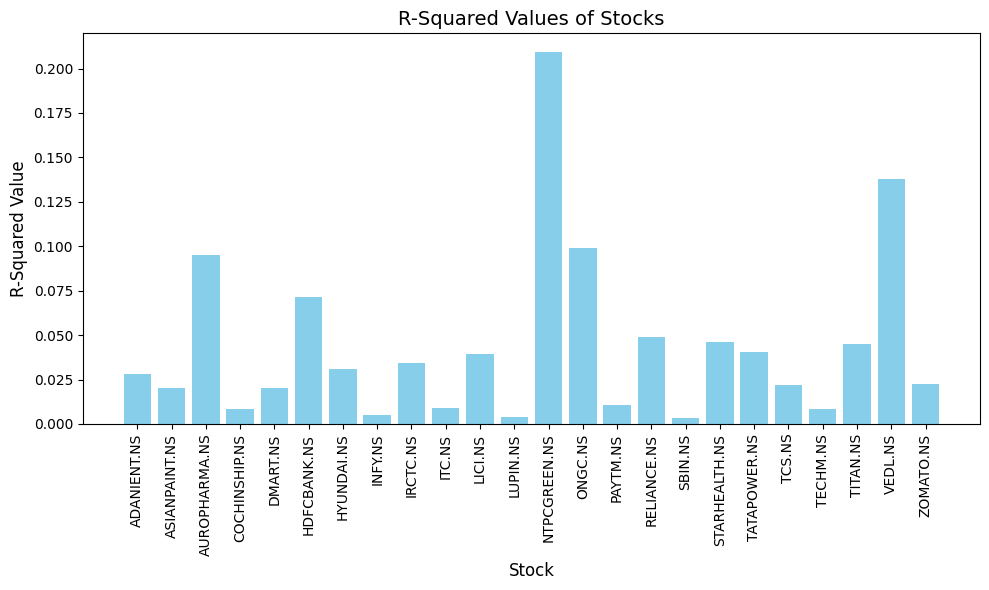

In [ ]:
# Plotting R-Squared values
plt.figure(figsize=(10, 6))
plt.bar(df_summary['Stock'], df_summary['R-Squared'], color='skyblue')
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Stock', fontsize=12)
plt.ylabel('R-Squared Value', fontsize=12)
plt.title('R-Squared Values of Stocks', fontsize=14)
plt.tight_layout()

# Show plot
plt.show()